In [2]:
import pandas as pd
import numpy as np  
from numpy import random

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from torchnlp.encoders import LabelEncoder

from transformers import AutoModel, AutoTokenizer

%matplotlib inline
%config InlineBackend.figure_format='retina'

RANDOM_SEED = 42

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8


the data here has been processed from raw icd9 diagnosis codes data in mimic-iii.

Whilst each subject can ultimately have multiple concurrent icd9 diagnoses - we are framing the task as predicting the diagnos code per admissions/discharge event, thus treating as i.i.d. Similar to that of : https://github.com/simonlevine/clinical-longformer/blob/master/Written%20Submission.pdf 


In [10]:
data_dir = "../data/intermediary-data"

train_df_all = pd.read_csv(f"{data_dir}/notes2diagnosis-icd-train.csv_top_codes_filtered.csv", index_col = None)

In [7]:
train_df.shape

(28105, 4)

In [11]:
train_df.head()

,Unnamed: 0,text,label
0,1,: : : Sex: F Service: CARDIOTHORACIC Allergies...,4240
1,3,: : : Sex: F Service: NEONATOLOGY HISTORY: wee...,V3001
2,6,: : : Sex: M Service: CARDIOTHORACIC Allergies...,41041
3,7,: : : Sex: F Service: MEDICINE Allergies: Peni...,51881
4,8,: : : Sex: F Service: CARDIOTHORACIC Allergies...,3962


In [5]:
# number of unique ids:

len(train_df.HADM_ID.unique())

28105

In [6]:
# number of uniqu icd9 codes
len(train_df.ICD9_CODE.unique())

2107

In [4]:
# just get top 50 for now

top_50_icd9 = train_df['ICD9_CODE'].value_counts()[:50].index.tolist()
top_50_icd9

['41401',
 '0389',
 '41071',
 'V3001',
 '4241',
 '51881',
 'V3000',
 'V3101',
 '431',
 '4240',
 '486',
 '5070',
 '430',
 '4280',
 '41011',
 '41041',
 '5789',
 '5849',
 '1983',
 '5770',
 '99662',
 '43411',
 '99859',
 '42731',
 '03842',
 '56212',
 '43491',
 '4373',
 '51884',
 'V3401',
 '5712',
 '4271',
 '85221',
 '42823',
 '03811',
 '03849',
 '41519',
 '4321',
 '4414',
 '0380',
 '53240',
 '99811',
 '1623',
 '3962',
 '5715',
 '042',
 '43310',
 '44101',
 '5761',
 '29181']

50

<AxesSubplot:>

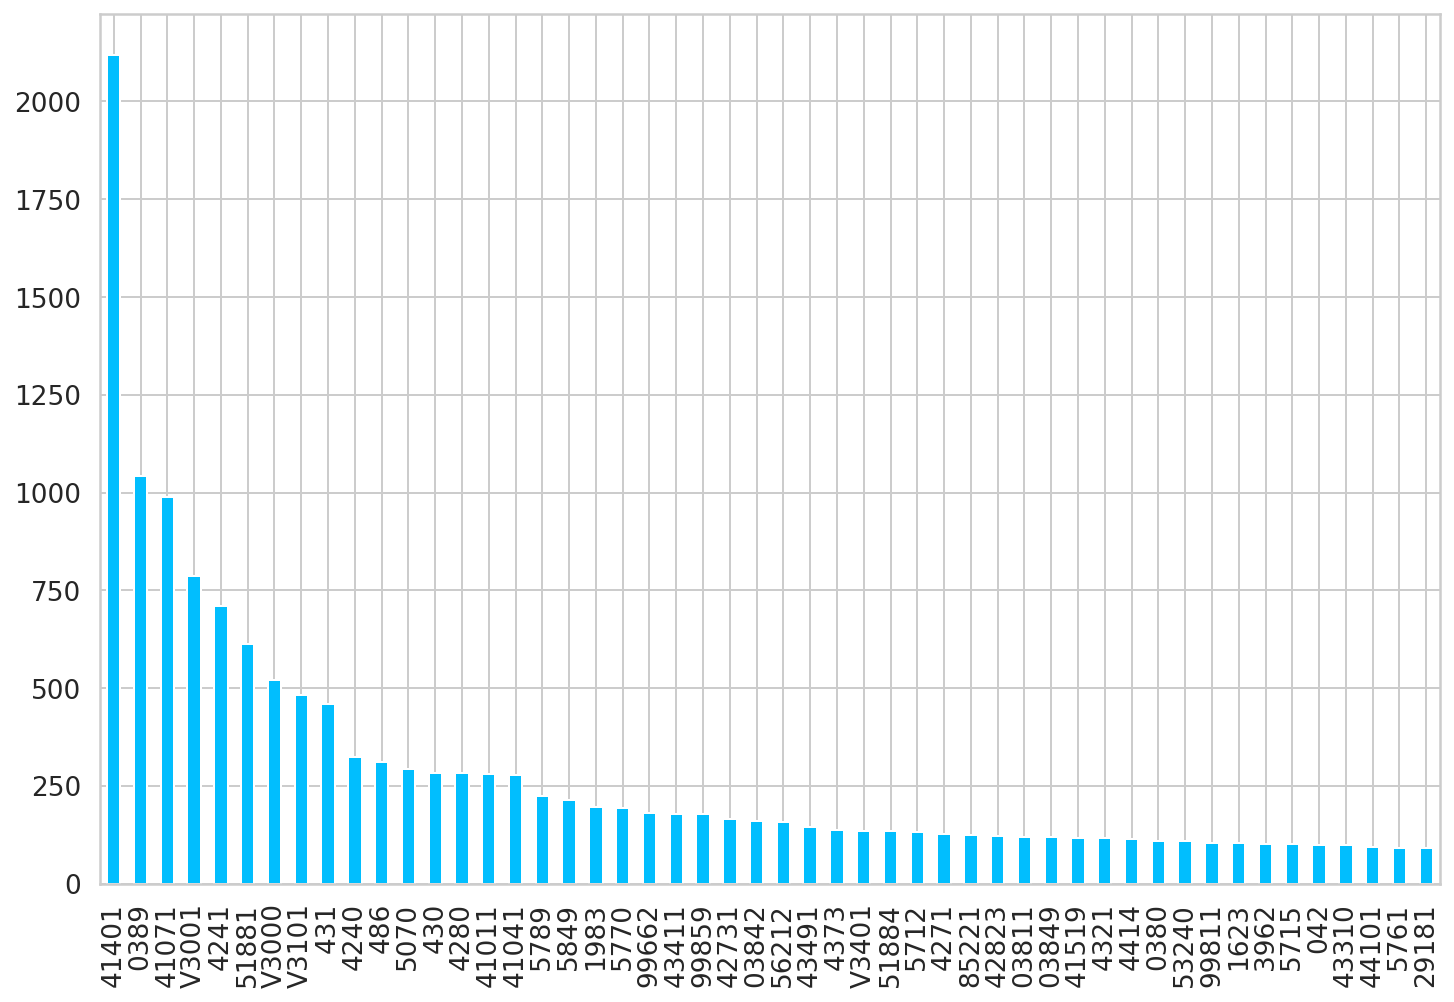

In [5]:
# do a lil plot
top_50_df = train_df[train_df['ICD9_CODE'].isin(top_50_icd9)]
top_50_df['ICD9_CODE'].value_counts().plot(kind = 'bar')

In [1]:
# icd9 code lookup
from icd9cms.icd9 import search

In [8]:
def get_icd9_descriptions(icd9_codes):
    
    return [search(code) for code in icd9_codes]

In [9]:
get_icd9_descriptions(top_50_icd9)

[41401:Crnry athrscl natve vssl:Coronary atherosclerosis of native coronary artery,
 0389:Septicemia NOS:Unspecified septicemia,
 41071:Subendo infarct, initial:Subendocardial infarction, initial episode of care,
 V3001:Single lb in-hosp w cs:Single liveborn, born in hospital, delivered by cesarean section,
 4241:Aortic valve disorder:Aortic valve disorders,
 51881:Acute respiratry failure:Acute respiratory failure,
 V3000:Single lb in-hosp w/o cs:Single liveborn, born in hospital, delivered without mention of cesarean section,
 V3101:Twin-mate lb-in hos w cs:Twin birth, mate liveborn, born in hospital, delivered by cesarean section,
 431:Intracerebral hemorrhage:None,
 4240:Mitral valve disorder:Mitral valve disorders,
 486:Pneumonia, organism unspecified:None,
 5070:Food/vomit pneumonitis:Pneumonitis due to inhalation of food or vomitus,
 430:Subarachnoid hemorrhage:None,
 4280:CHF NOS:Congestive heart failure, unspecified,
 41011:AMI anterior wall, init:Acute myocardial infarction o

# can check the raw icd9 data files below

In [18]:
# raw icd 9 data
raw_data_dir = "/home/niallt/NLP_DPhil/DPhil_projects/mimic-icd9-classification/clinical-longformer/data/physionet.org/files/mimiciii/1.4/zipped_data/"
raw_icd9 = pd.read_csv(f"{raw_data_dir}/DIAGNOSES_ICD.csv.gz")

In [19]:
raw_icd9

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254
...,...,...,...,...,...
651042,639798,97503,188195,2.0,20280
651043,639799,97503,188195,3.0,V5869
651044,639800,97503,188195,4.0,V1279
651045,639801,97503,188195,5.0,5275


## look at label encder

In [12]:
labels = LabelEncoder(np.unique(top_50_df.ICD9_CODE).tolist(), 
                    reserved_labels=[])

In [17]:
labels.index_to_token[13]

'41401'

In [16]:
labels.token_to_index['41401']

13

# Random spacy bits

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="spacy is cool but a bit of a pain spacy spacy"
# sentence_2="This is not good at all. We do not have any cheese here. Crocodiles are big"
 
 
 


In [38]:

sentence_1_random = sentence_1.split(" ")
sentence_1_random

['spacy', 'is', 'cool', 'but', 'a', 'bit', 'of', 'a', 'pain', 'spacy', 'spacy']

In [35]:
random.shuffle(sentence_1_random)

In [36]:
new_sentence = " ".join(sentence_1_random)

In [39]:
sentence_1="spacy is cool but a bit of a pain spacy spacy"
sentence_1_random = sentence_1.split(" ")
random.shuffle(sentence_1_random)
new_sentence = " ".join(sentence_1_random)

CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           )
#transform
Count_data = CountVec.fit_transform([sentence_1, new_sentence])
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

   bit  but  cool  is  of  pain  spacy
0    1    1     1   1   1     1      3
1    1    1     1   1   1     1      3


C:\Users\ntaylor\Anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
ys = [0,1,1,0,0,0,1]
y_changed = random.permutation(ys)
print(ys)
print(y_changed)

[0, 1, 1, 0, 0, 0, 1]
[0 0 1 0 1 0 1]


In [15]:
df = pd.DataFrame({"y":[0,1,1,1,0],"x":["a","b","c","d","e"]})
df

,y,x
0,0,a
1,1,b
2,1,c
3,1,d
4,0,e


In [27]:
df2 = df.copy()
df2["y"] = np.random.permutation(df2["y"])
df2


,y,x
0,0,a
1,0,b
2,1,c
3,1,d
4,1,e


WindowsPath('C:/Downloads/random/test')